## Final Project Submission

* Student name: Bonny Nichol
* Student pace: Self Paced
* Scheduled project review date/time: November 17, 2020
* Instructor name: Jeff Herman
* Blog post URL:


In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

/Users/rosegold/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
# load dataset
df = pd.read_csv('crashes.csv')
df.head()

CRASH_RECORD_ID     RD_NO  \
0  073682ef84ff827659552d4254ad1b98bfec24935cc9cc...  JB460108   
1  1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...  JC325941   
2  c7e667807d86ff2e83da48267e1135680cad68c86eb00f...  JD150617   
3  009e9e67203442370272e1a13d6ee51a4155dac65e583d...  JA329216   
4  00e47f189660cd8ba1e85fc63061bf1d8465184393f134...  JC194776   

  CRASH_DATE_EST_I              CRASH_DATE  POSTED_SPEED_LIMIT  \
0              NaN  10/02/2018 06:30:00 PM                  10   
1              NaN  06/27/2019 04:00:00 PM                  45   
2              NaN  02/13/2020 04:30:00 PM                  30   
3              NaN  06/30/2017 04:00:00 PM                  35   
4              NaN  03/21/2019 10:50:00 PM                  30   

  TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION WEATHER_CONDITION  \
0            NO CONTROLS           NO CONTROLS             CLEAR   
1            NO CONTROLS           NO CONTROLS             CLEAR   
2            NO CONTROLS           NO CONTROLS             CLEAR   
3      STOP SIGN/FLASHER  FUNCTIONING PROPERLY             CLEAR   
4         TRAFFIC SIGNAL  FUNCTIONING PROPERLY             CLEAR   

       LIGHTING_CONDITION          FIRST_CRASH_TYPE  ...  \
0                DARKNESS      PARKED MOTOR VEHICLE  ...   
1                DAYLIGHT  SIDESWIPE SAME DIRECTION  ...   
2                DAYLIGHT  SIDESWIPE SAME DIRECTION  ...   
3                DAYLIGHT                   TURNING  ...   
4  DARKNESS, LIGHTED ROAD                   TURNING  ...   

  INJURIES_NON_INCAPACITATING  INJURIES_REPORTED_NOT_EVIDENT  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            1.0   
3                         0.0                            0.0   
4                         0.0                            0.0   

  INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
0                    1.0              0.0         18                 3   
1                    2.0              0.0         16                 5   
2                    2.0              0.0         16                 5   
3                    3.0              0.0         16                 6   
4                    2.0              0.0         22                 5   

  CRASH_MONTH   LATITUDE  LONGITUDE                                  LOCATION  
0          10        NaN        NaN                                       NaN  
1           6        NaN        NaN                                       NaN  
2           2        NaN        NaN                                       NaN  
3           6  41.741804 -87.740954  POINT (-87.740953581987 41.741803598989)  
4           3  41.741804 -87.740954  POINT (-87.740953581987 41.741803598989)  

[5 rows x 49 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453873 entries, 0 to 453872
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                453873 non-null  object 
 1   RD_NO                          450376 non-null  object 
 2   CRASH_DATE_EST_I               33749 non-null   object 
 3   CRASH_DATE                     453873 non-null  object 
 4   POSTED_SPEED_LIMIT             453873 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         453873 non-null  object 
 6   DEVICE_CONDITION               453873 non-null  object 
 7   WEATHER_CONDITION              453873 non-null  object 
 8   LIGHTING_CONDITION             453873 non-null  object 
 9   FIRST_CRASH_TYPE               453873 non-null  object 
 10  TRAFFICWAY_TYPE                453873 non-null  object 
 11  LANE_CNT                       198959 non-null  float64
 12  ALIGNMENT                     

In [29]:
#A heatmap of the missing values visually shows the data that is missing
#sns.heatmap(df.isnull())
#plt.show()

In [30]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [31]:
crashdata = df.drop(['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
        'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
        'WORKERS_PRESENT_I'], axis=1)
crashdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453873 entries, 0 to 453872
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                453873 non-null  object 
 1   RD_NO                          450376 non-null  object 
 2   CRASH_DATE                     453873 non-null  object 
 3   POSTED_SPEED_LIMIT             453873 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         453873 non-null  object 
 5   DEVICE_CONDITION               453873 non-null  object 
 6   WEATHER_CONDITION              453873 non-null  object 
 7   LIGHTING_CONDITION             453873 non-null  object 
 8   FIRST_CRASH_TYPE               453873 non-null  object 
 9   TRAFFICWAY_TYPE                453873 non-null  object 
 10  ALIGNMENT                      453873 non-null  object 
 11  ROADWAY_SURFACE_COND           453873 non-null  object 
 12  ROAD_DEFECT                   

In [32]:
crashdata.isnull().any()

CRASH_RECORD_ID                  False
RD_NO                             True
CRASH_DATE                       False
POSTED_SPEED_LIMIT               False
TRAFFIC_CONTROL_DEVICE           False
DEVICE_CONDITION                 False
WEATHER_CONDITION                False
LIGHTING_CONDITION               False
FIRST_CRASH_TYPE                 False
TRAFFICWAY_TYPE                  False
ALIGNMENT                        False
ROADWAY_SURFACE_COND             False
ROAD_DEFECT                      False
REPORT_TYPE                       True
CRASH_TYPE                       False
DAMAGE                           False
DATE_POLICE_NOTIFIED             False
PRIM_CONTRIBUTORY_CAUSE          False
SEC_CONTRIBUTORY_CAUSE           False
STREET_NO                        False
STREET_DIRECTION                  True
STREET_NAME                       True
BEAT_OF_OCCURRENCE                True
NUM_UNITS                        False
MOST_SEVERE_INJURY                True
INJURIES_TOTAL           

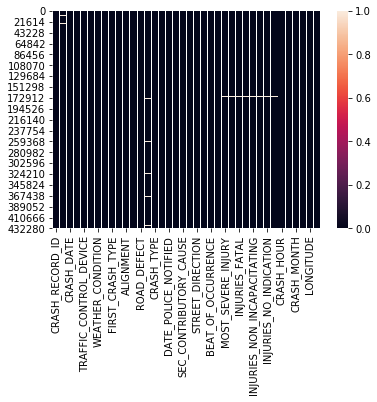

In [33]:
#sns.heatmap(crashdata.isnull())
#plt.show()

In [40]:
crashdata['POSTED_SPEED_LIMIT'].value_counts()

30    334265
35     31352
25     27461
20     17564
15     15740
10      9371
0       6706
40      4120
5       3577
45      2710
55       423
3        111
50        95
9         89
99        66
39        49
1         35
60        26
2         19
32        13
24        13
65        12
33         9
34         7
6          7
36         5
11         5
70         3
14         2
12         2
18         2
26         2
31         2
7          2
4          1
49         1
63         1
16         1
23         1
29         1
38         1
22         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [41]:
crashdata['CRASH_MONTH'].value_counts()

10    46438
9     43290
8     41900
7     40151
6     38032
11    37454
12    37012
5     36907
1     34455
3     33761
2     33022
4     31451
Name: CRASH_MONTH, dtype: int64